# **1: IMPORTAR LIBRARIAS/DATASETS Y REALIZAR ANÁLISIS EXPLORATORIO DE DATOS**



In [1]:
from google.colab import files
from google.colab import drive
#subidos = files.upload() #Instruccion para pedir al usuario un archivo
#print(subidos)
drive.mount('/content/drive') #Debemos confirmar acceso a nuestra cuenta para el COLAB
#print(drive.mount) #Imprime una direccion hexadecimal del apuntador a la carpeta drive
%cd "/content/drive/My Drive/Colab Notebooks/CienciaDatosPython/CasoPractico"
%pwd
%ls


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/CienciaDatosPython/CasoPractico
gym_members_exercise_tracking.csv  marketing_campaign3.txt  marketing_campaign.csv


In [2]:
import numpy as np # Manipulación de arrays Multi-dimensionales
import pandas as pd # Manipulación de DataFrames
import matplotlib.pyplot as plt # Visualización de Datos
import seaborn as sns #Visualización de Datos
from sklearn import metrics


In [6]:
# Leer el fichero CSV
gym_df = pd.read_csv("gym_members_exercise_tracking.csv")

In [7]:
# Cargar las 5 primeras observaciones
gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [8]:
# Cargar las 5 últimas observaciones
gym_df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


In [9]:
# Comprobar la dimensión del dataframe
gym_df.shape

(973, 15)

In [10]:
# Mostrar las columnas de las características
gym_df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [11]:
# Obtener el resumen de los tipos de datos del dataframe
gym_df.dtypes

,0
Age,int64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,int64
Avg_BPM,int64
Resting_BPM,int64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


In [21]:
#Comprobar si hay valores nulos
gym_df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


# **2: VISUALIZACION DE DATOS**


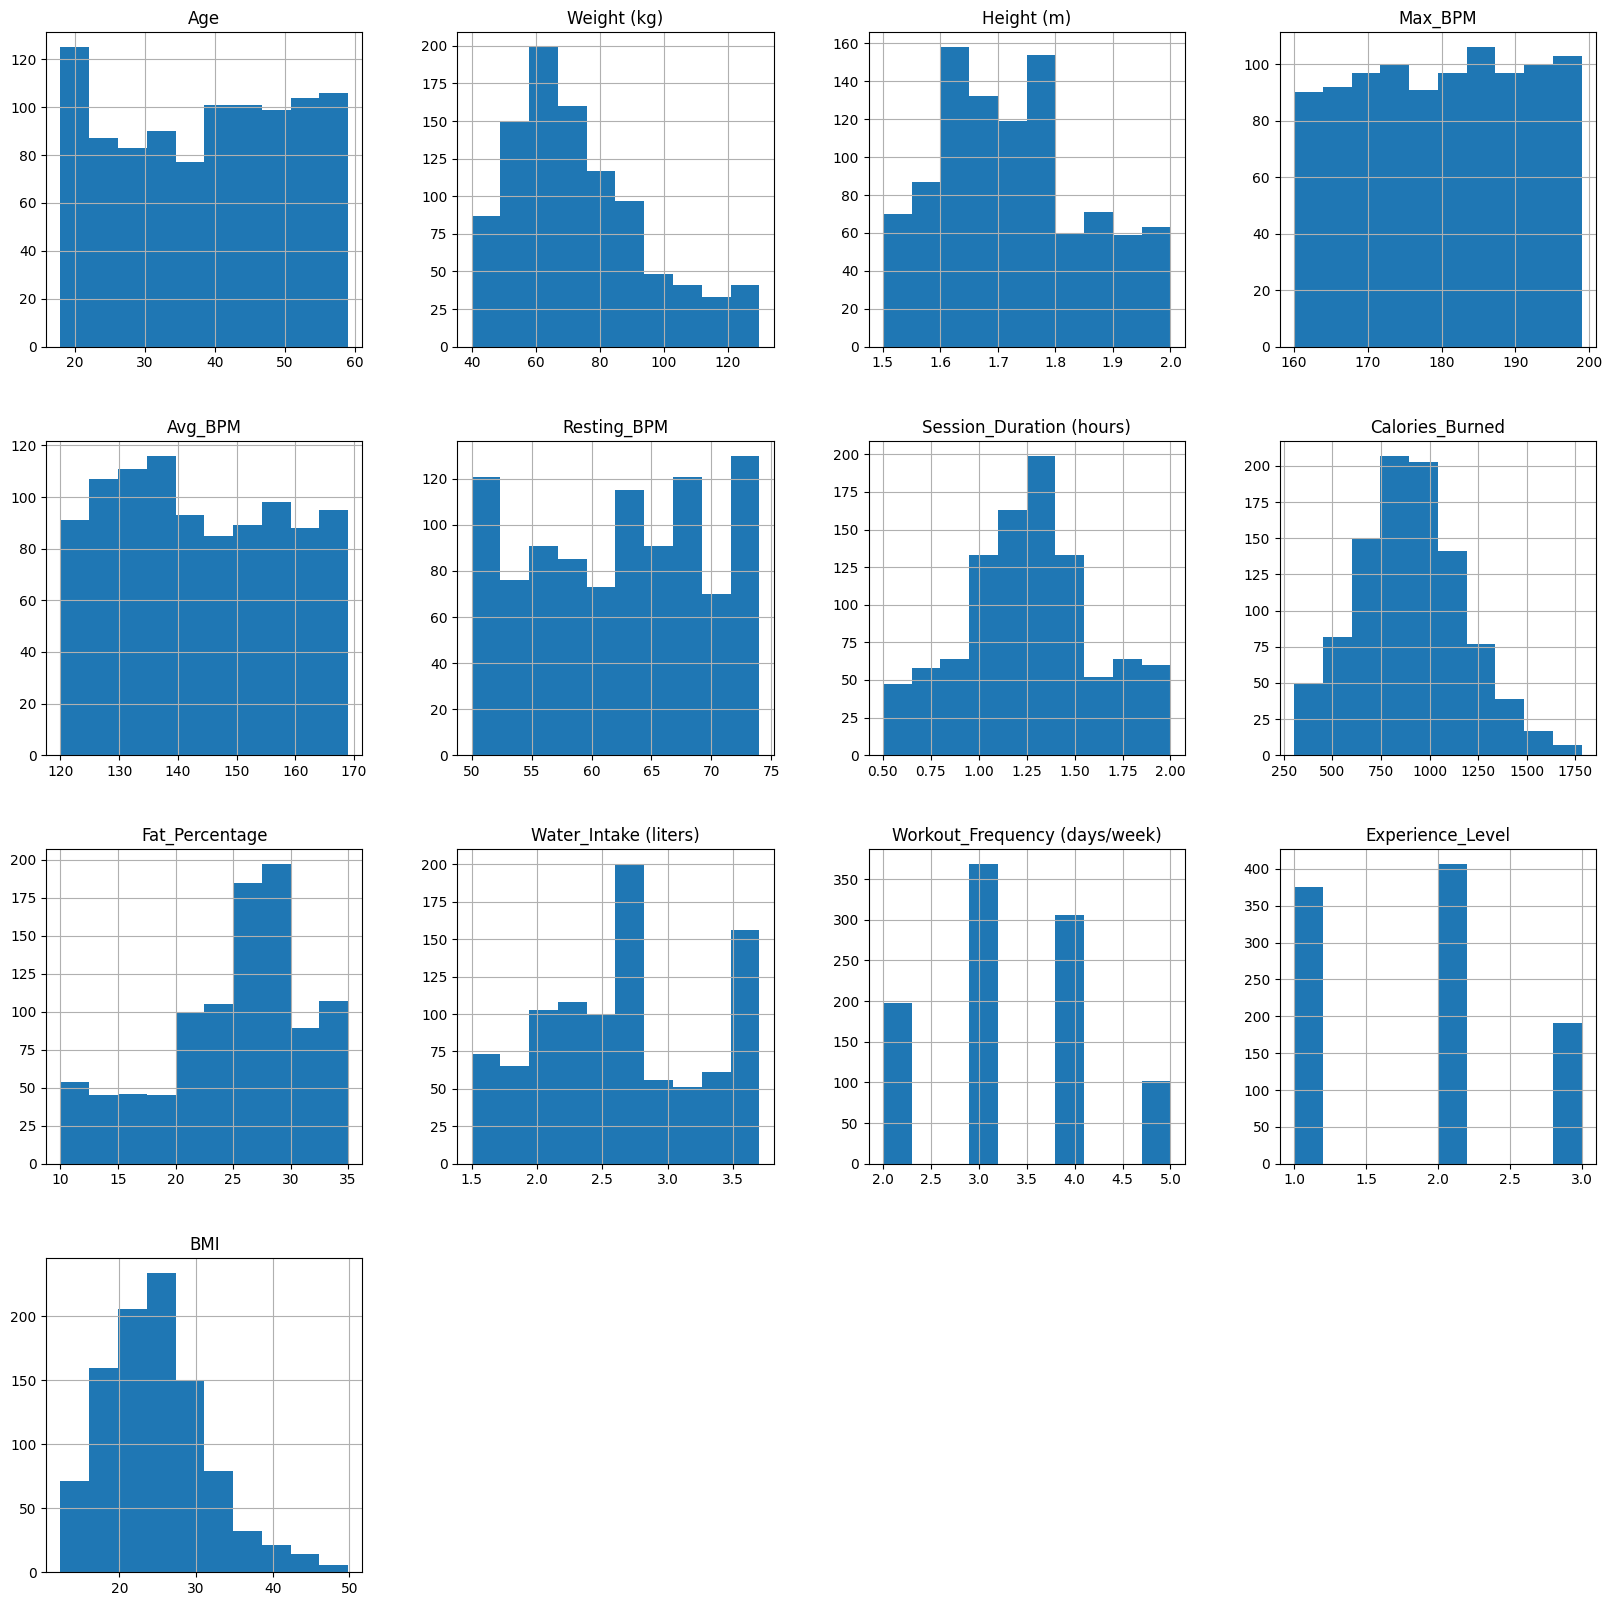

In [14]:
gym_df.hist(figsize = (20, 20))
plt.show()

In [32]:
gym_df["Experience_Level"].value_counts()

,count
Experience_Level,
2,406
1,376
3,191


<Axes: ylabel='Frequency'>

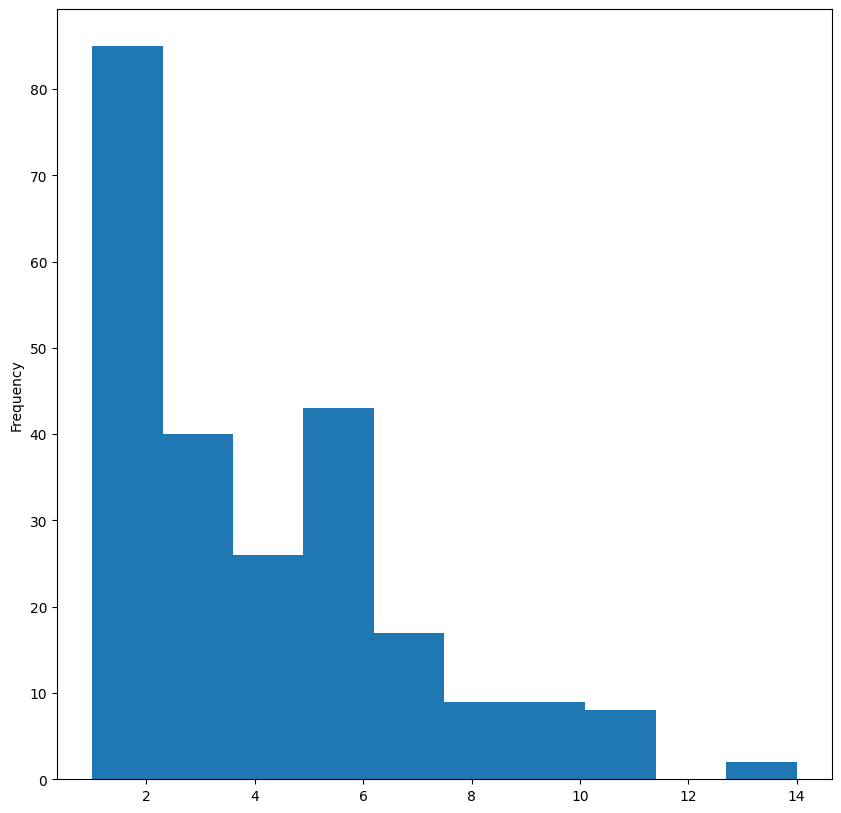

In [111]:
plt.figure(figsize = [10, 10])
gym_df["Fat_Percentage"].value_counts().plot(kind='hist')

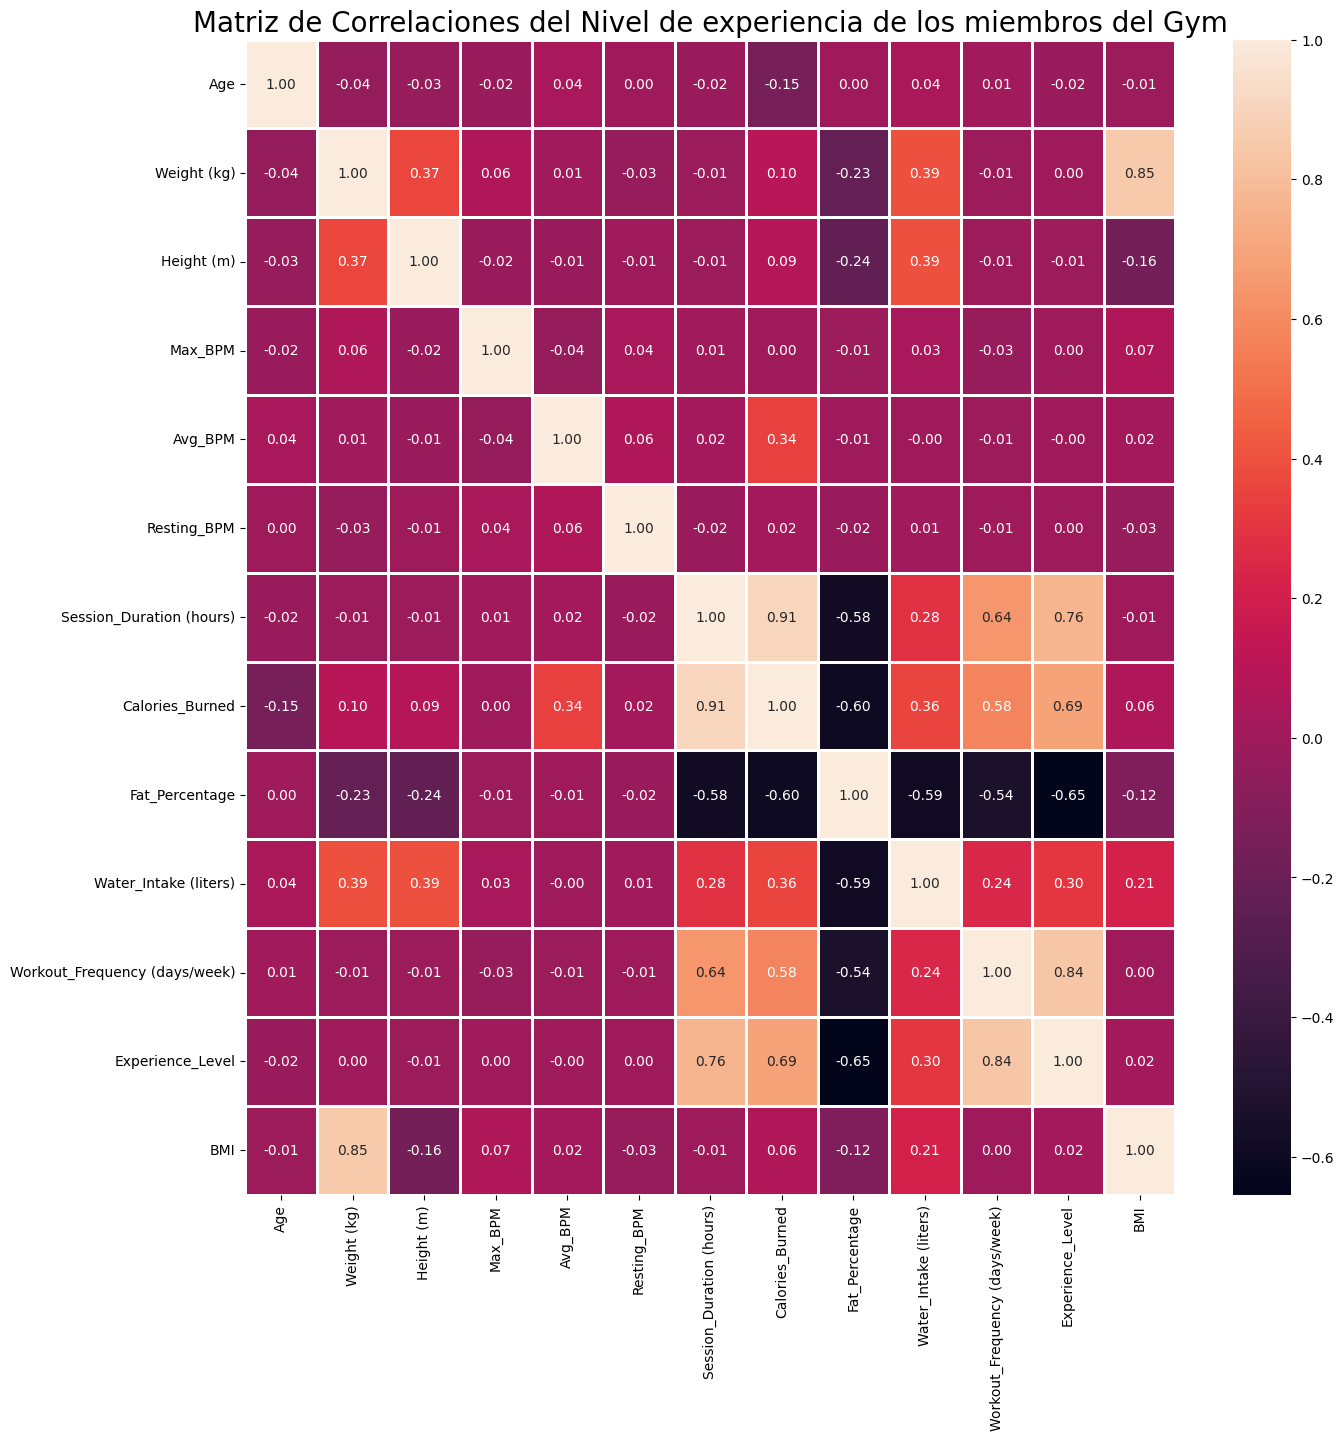

In [42]:
# Matriz de Correlaciones
gym_el_df = gym_df.select_dtypes(exclude=['object'])
corr_matrix = gym_el_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,linewidths = 1,annot = True,fmt = ".2f")
plt.title("Matriz de Correlaciones del Nivel de experiencia de los miembros del Gym", fontsize = 20)
plt.show()

# Se muestra que el Peso kg esta altamente relacionado con el BMI (indice de masa corporal), asi como relacion evidente con altura y agua consumida.
# Tambien de aprecia que las calorias quemadas se relaciona con la frecuencia promedio del entrenamiento
# La duracion de la sesion con las calorias quemadas, tambien con una fuerte relacion
# El nivel de experiencia y la frecuenda de entrenamiento a la semana

# **3: IDENTIFICAR LA IMPORTANCIA DE LAS CARACTERÍSTICAS Y PREPARAR LOS DATOS ANTES DEL ENTRENAMIENTO DEL MODELO**

In [44]:
# Las características innecesarias disminuirían la velocidad de entrenamiento, la interpretabilidad del modelo y el rendimiento de la generalización en los datos de prueba.
# Por lo tanto, es crucial encontrar y seleccionar las características más útiles en el conjunto de datos.
# Asignación de características de entrada a X y de salida (Churn) a y

X = gym_el_df.drop(["Experience_Level", "Age"], axis = "columns") # Se descarta la edad para el analisis
y = gym_el_df["Experience_Level"]

In [46]:
X.shape


(973, 11)

In [47]:
y.shape

(973,)

In [48]:
# Realizar la división de entrenamiento/prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150) #30% para pruebas y el resto 70% entrenamiento

In [49]:
X_train.shape

(681, 11)

In [50]:
X_test.shape

(292, 11)

In [51]:
from sklearn.ensemble import RandomForestClassifier #Algoritmos de conjunto/ensamblado

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel()) #que lo entrene y ajuste para predecir Y

RandomForestClassifier()

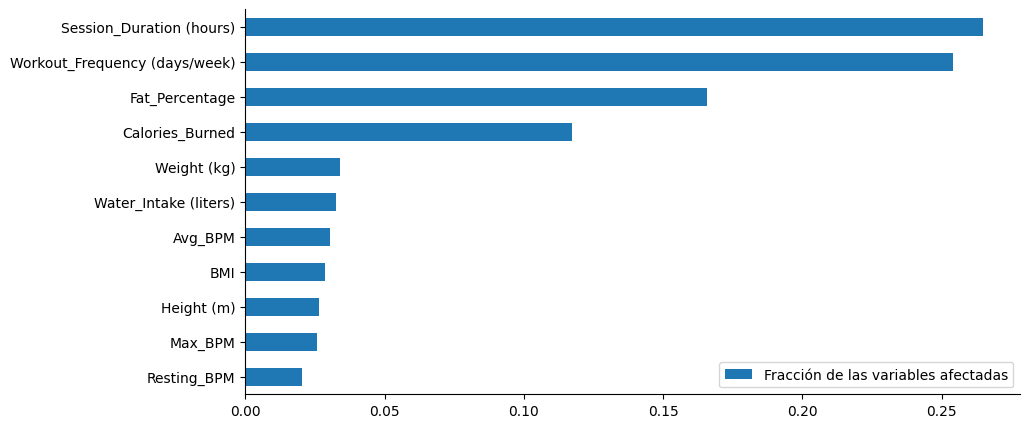

In [52]:
# Representar la importancia de las características, ¿cuales son las variables importantes?
feat_scores= pd.DataFrame({"Fracción de las variables afectadas" : rf.feature_importances_},index = X.columns) #Que tanto aporta esa variable al modelo
feat_scores= feat_scores.sort_values(by = "Fracción de las variables afectadas")#Ordenaslas según la importancia.
feat_scores.plot(kind = "barh", figsize = (10, 5)) #hacemos un grafico de barras horizontal de la mas a la menos importante
sns.despine() #limita el eje x  y al contenido

In [53]:
# El gráfico anterior es generado por el algoritmo Random Forest
# El gráfico indica que "la duracion de la Sesion" encabeza la lista de características importantes seguido de "La frecuencia de entrenamiento" y así sucesivamente.

# **4: ENTRENAR Y EVALUAR UN CLASIFICADOR DE REGRESIÓN LOGÍSTICA**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

modelo_LR = LogisticRegression()

modelo_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_predict = modelo_LR.predict(X_test)

In [56]:
print(classification_report(y_test, y_predict))
# La precisión es la relación TP/(TP+FP)
#    TP = Verdaderos Positivos
#    FP = Falsos Positivos
#    FN = Falsos Negativos
# El recall (recuperación) es la relación entre TP/(TP+FN)
# La puntuación F-beta puede interpretarse como una media armónica ponderada de la precisión y la recuperación.
# donde una puntuación F-beta alcanza su mejor valor en 1 y su peor puntuación en 0.
# f-score = 2 * [(Precision * Recall) / (Precision + Recall)

              precision    recall  f1-score   support

           1       0.79      0.69      0.74       110
           2       0.74      0.83      0.78       119
           3       0.98      0.97      0.98        63

    accuracy                           0.81       292
   macro avg       0.84      0.83      0.83       292
weighted avg       0.81      0.81      0.81       292



<Axes: >

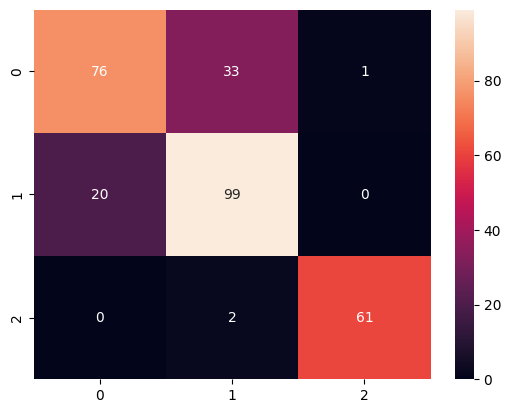

In [57]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **5: ENTRENAR Y EVALUAR UN CLASIFICADOR DE MÁQUINA DE SOPORTE VECTORIAL**

In [59]:
from sklearn.calibration import CalibratedClassifierCV # Para la salida de la puntuación de probabilidad
from sklearn.svm import LinearSVC #maquina de siporte vectorial lineal

modelo_svc = LinearSVC(max_iter=100000) #pero no 100 sino 100000 iteraciones para calibrar de hacer falta
modelo_svm = CalibratedClassifierCV(modelo_svc) #primero creamos el modelo, luego equilibrar
modelo_svm.fit(X_train, y_train) #Este ajustara al y_train

CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [60]:
y_predict = modelo_svm.predict(X_test) #para hacer una prediccion, ya que no conoce la prediccion

In [61]:
print(classification_report(y_test, y_predict)) #teniendo la prediccion, imprimimos el valor real de y_test Vs la preduccion del modelo vectorial

              precision    recall  f1-score   support

           1       0.81      0.85      0.83       110
           2       0.84      0.82      0.83       119
           3       1.00      0.98      0.99        63

    accuracy                           0.86       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.86      0.86      0.86       292



<Axes: >

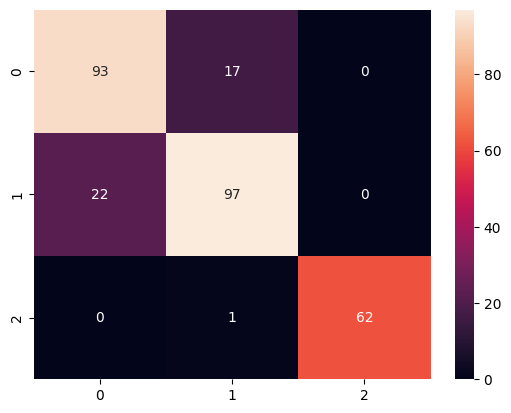

In [62]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **6: ENTRENAR Y EVALUAR UN CLASIFICADOR DE BOSQUE ALEATORIO**

In [63]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier() #por default trabaja con 100 arboles/estimadores
modelo_rf.fit(X_train, y_train) #apliquemos el método de entrenamiento

RandomForestClassifier()

In [64]:
y_predict = modelo_rf.predict(X_test)

In [65]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.91      0.81      0.86       110
           2       0.84      0.92      0.88       119
           3       1.00      1.00      1.00        63

    accuracy                           0.90       292
   macro avg       0.92      0.91      0.91       292
weighted avg       0.90      0.90      0.90       292



<Axes: >

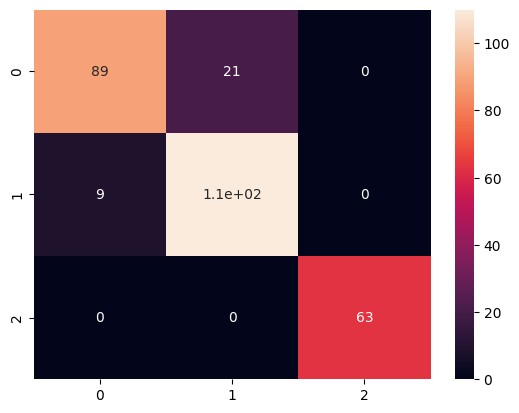

In [66]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **7: ENTRENAR Y EVALUAR UN K-NEAREST NEIGHBOUR (KNN)**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier() #por default trabaja con 5 vecinos.
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_predict = modelo_knn.predict(X_test)

In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.61      0.55      0.58       110
           2       0.56      0.67      0.61       119
           3       0.96      0.76      0.85        63

    accuracy                           0.64       292
   macro avg       0.71      0.66      0.68       292
weighted avg       0.66      0.64      0.65       292



<Axes: >

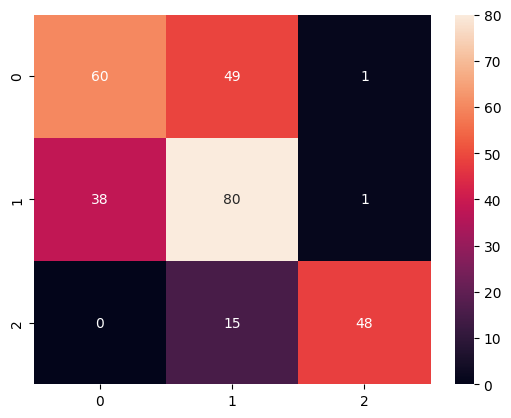

In [70]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **8: ENTRENAR Y EVALUAR UN CLASIFICADOR NAIVE BAYES**

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
modelo_gnb = GaussianNB()
modelo_gnb.fit(X_train, y_train)

GaussianNB()

In [73]:
y_predict = modelo_gnb.predict(X_test)

In [74]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.91      0.80      0.85       110
           2       0.83      0.92      0.88       119
           3       1.00      1.00      1.00        63

    accuracy                           0.89       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.90      0.89      0.89       292



<Axes: >

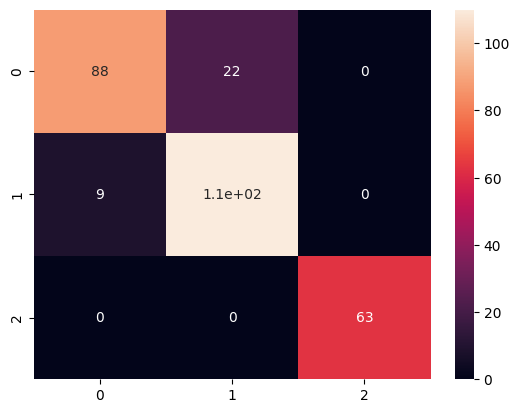

In [75]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

#9: COMPARACIÓN DE LOS MODELOS DE CLASIFICACIÓN ENTRENADOS Y OBSERVACIONES FINALES

Comprueba este enlace: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [76]:
modelo_LR.predict_proba(X_test)
# El primer elemento es la probabilidad de que la salida sea 0
# El segundo elemento es la probabilidad de que la salida sea 1

array([[3.62374520e-01, 6.37625122e-01, 3.58281807e-07],
       [7.57686986e-04, 1.30410109e-01, 8.68832204e-01],
       [6.40441116e-01, 3.59558884e-01, 1.00055668e-10],
       [2.35390858e-01, 7.64609126e-01, 1.59575298e-08],
       [6.71076831e-01, 3.28923169e-01, 1.09154008e-10],
       [5.73504657e-01, 4.26495294e-01, 4.98334450e-08],
       [9.34379630e-02, 8.85532502e-01, 2.10295351e-02],
       [3.87893544e-09, 3.57253839e-06, 9.99996424e-01],
       [4.37005537e-01, 5.62994361e-01, 1.02425553e-07],
       [6.10249173e-01, 3.89750827e-01, 2.36217058e-12],
       [8.60218688e-01, 1.39781312e-01, 1.09601845e-10],
       [3.54833667e-01, 6.45166333e-01, 6.89134582e-11],
       [2.70763901e-01, 7.29200737e-01, 3.53623600e-05],
       [8.89580908e-06, 9.11401748e-04, 9.99079702e-01],
       [6.30728895e-01, 3.69271084e-01, 2.08804533e-08],
       [1.40352091e-05, 3.98421549e-03, 9.96001749e-01],
       [4.81894419e-01, 5.18105581e-01, 2.52909410e-11],
       [1.82236907e-01, 8.17763

In [77]:
modelo_LR.predict_proba(X_test)[:, 1]

array([6.37625122e-01, 1.30410109e-01, 3.59558884e-01, 7.64609126e-01,
       3.28923169e-01, 4.26495294e-01, 8.85532502e-01, 3.57253839e-06,
       5.62994361e-01, 3.89750827e-01, 1.39781312e-01, 6.45166333e-01,
       7.29200737e-01, 9.11401748e-04, 3.69271084e-01, 3.98421549e-03,
       5.18105581e-01, 8.17763092e-01, 1.70419549e-02, 6.13082785e-01,
       7.29342659e-01, 8.51441079e-02, 8.66478614e-01, 6.76901676e-01,
       8.13136611e-01, 1.30380015e-01, 7.97088054e-01, 5.47211526e-01,
       1.05712864e-08, 1.37254668e-01, 1.06536478e-02, 5.03465983e-01,
       2.05620517e-01, 3.41722187e-01, 5.42253868e-01, 1.79966825e-01,
       2.88992013e-01, 1.64381276e-02, 6.86658419e-04, 7.81488183e-01,
       3.86317134e-01, 1.90869783e-02, 3.38490376e-01, 1.91627217e-01,
       7.12671612e-01, 5.34456792e-01, 3.39731249e-01, 5.92333139e-01,
       2.14820203e-01, 8.17323526e-01, 1.66559477e-01, 1.31580526e-05,
       6.45929389e-07, 5.60169496e-01, 7.19103806e-01, 9.39833973e-01,
      

In [78]:
y_test

,Experience_Level
871,2
759,3
521,1
699,2
41,1
...,...
898,2
201,3
343,2
172,3


In [79]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, modelo_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [80]:
fpr1

array([0.        , 0.00549451, 0.18131868, 0.18131868, 0.25824176,
       0.25824176, 0.32417582, 0.32417582, 0.34065934, 0.34065934,
       0.35164835, 0.35164835, 0.38461538, 0.38461538, 0.4010989 ,
       0.4010989 , 0.40659341, 0.40659341, 0.41208791, 0.41208791,
       0.43406593, 0.43406593, 0.43956044, 0.43956044, 0.44505495,
       0.44505495, 0.46153846, 0.46153846, 0.47252747, 0.47252747,
       0.48351648, 0.48351648, 0.48901099, 0.48901099, 0.51098901,
       0.51098901, 0.51648352, 0.51648352, 0.52197802, 0.52197802,
       0.52747253, 0.52747253, 0.54395604, 0.54395604, 0.55494505,
       0.55494505, 0.57692308, 0.57692308, 0.58791209, 0.58791209,
       0.6043956 , 0.6043956 , 0.60989011, 0.60989011, 0.61538462,
       0.61538462, 0.62087912, 0.62087912, 0.63186813, 0.63186813,
       0.64285714, 0.64285714, 0.64835165, 0.64835165, 0.65384615,
       0.65384615, 0.67032967, 0.67032967, 0.67582418, 0.67582418,
       0.68131868, 0.68131868, 0.68681319, 0.68681319, 0.70329

In [81]:
tpr1

array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
       0.01818182, 0.01818182, 0.03636364, 0.03636364, 0.04545455,
       0.04545455, 0.05454545, 0.05454545, 0.06363636, 0.06363636,
       0.1       , 0.1       , 0.10909091, 0.10909091, 0.11818182,
       0.11818182, 0.12727273, 0.12727273, 0.13636364, 0.13636364,
       0.14545455, 0.14545455, 0.15454545, 0.15454545, 0.16363636,
       0.16363636, 0.19090909, 0.19090909, 0.20909091, 0.20909091,
       0.21818182, 0.21818182, 0.22727273, 0.22727273, 0.23636364,
       0.23636364, 0.26363636, 0.26363636, 0.27272727, 0.27272727,
       0.32727273, 0.32727273, 0.36363636, 0.36363636, 0.37272727,
       0.37272727, 0.41818182, 0.41818182, 0.42727273, 0.42727273,
       0.43636364, 0.43636364, 0.44545455, 0.44545455, 0.45454545,
       0.45454545, 0.55454545, 0.55454545, 0.58181818, 0.58181818,
       0.59090909, 0.59090909, 0.6       , 0.6       , 0.66363636,
       0.66363636, 0.82727273, 0.82727273, 0.96363636, 0.96363

In [82]:
thresh1

array([           inf, 9.57642573e-01, 8.56891955e-01, 8.49166579e-01,
       8.08928275e-01, 8.08580770e-01, 7.77825573e-01, 7.71204283e-01,
       7.65305440e-01, 7.65088407e-01, 7.63797145e-01, 7.58239755e-01,
       7.20507529e-01, 7.19103806e-01, 7.02633840e-01, 6.84678246e-01,
       6.83797806e-01, 6.82767494e-01, 6.78846527e-01, 6.76901676e-01,
       6.67129544e-01, 6.55365750e-01, 6.53972724e-01, 6.51315862e-01,
       6.45166333e-01, 6.40558212e-01, 6.13082785e-01, 6.03578701e-01,
       5.98908170e-01, 5.94254025e-01, 5.86635040e-01, 5.80923716e-01,
       5.78498646e-01, 5.76338152e-01, 5.64181036e-01, 5.62994361e-01,
       5.60169496e-01, 5.49769136e-01, 5.47211526e-01, 5.45269657e-01,
       5.42253868e-01, 5.23929190e-01, 5.18105581e-01, 5.16888588e-01,
       5.06510814e-01, 4.86864397e-01, 4.66313433e-01, 4.51179224e-01,
       4.48926632e-01, 4.48588051e-01, 4.38026827e-01, 4.16666037e-01,
       4.06168036e-01, 4.05076815e-01, 4.01752283e-01, 3.99223946e-01,
      

In [83]:
# Curva ROC
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, modelo_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, modelo_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, modelo_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, modelo_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, modelo_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [97]:
# Puntuación AUC /// se nececita un multiclase

#from sklearn.metrics import roc_auc_score

#auc_score1 = roc_auc_score(y_test, modelo_LR.predict_proba(X_test)[:, 1])
#auc_score2 = roc_auc_score(y_test, modelo_svm.predict_proba(X_test)[:, 1])
#auc_score3 = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
#auc_score4 = roc_auc_score(y_test, modelo_knn.predict_proba(X_test)[:, 1])
#auc_score5 = roc_auc_score(y_test, modelo_gnb.predict_proba(X_test)[:, 1])

#print("Regresión Logística: ", auc_score1) # Regresión Logística
#print("Máquina de Soporte Vectorial: ", auc_score2) # Máquina de Soporte Vectorial
#print("Bosque Aleatorio: ", auc_score3) # Bosque Aleatorio
#print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
#print("Naive Bayes: ", auc_score5) # Naive Bayes

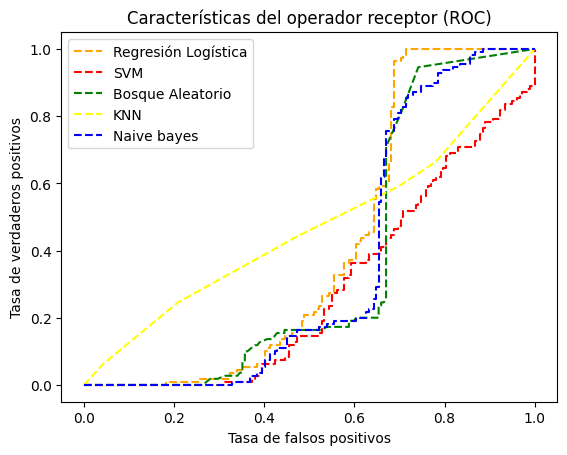

In [95]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Regresión Logística")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Bosque Aleatorio")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "blue", label = "Naive bayes")

plt.title('Características del operador receptor (ROC)')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

#CONCLUSIONES

El gráfico muestra que el algoritmo de Regresion Logistica obtuvo el mejor AUC. Por lo tanto, está claro que el modelo de regresion Logistica realizó un mejor trabajo a la hora de clasificar el nivel de experiencia de los miembros del Gym.

In [109]:
y_predict = modelo_LR.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.79      0.69      0.74       110
           2       0.74      0.83      0.78       119
           3       0.98      0.97      0.98        63

    accuracy                           0.81       292
   macro avg       0.84      0.83      0.83       292
weighted avg       0.81      0.81      0.81       292

